In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pyLDAvis scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pyLDAvis

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import jsonlines

In [5]:
def read_json_chunks(file_path, chunk_size):
    def json_generator():
        for chunk in pd.read_json(file_path, lines=True, chunksize=chunk_size):
            yield chunk

    generator = json_generator()
    df = next(generator)
    return df

In [6]:
chunk_size = 100000
dataset_path_review ='yelp_academic_dataset_review.json'

df_review = read_json_chunks(dataset_path_review, chunk_size)

In [7]:
#dataset_path_review ='yelp_academic_dataset_review.json'


#chunk_size = 100000

#data_review_chunks = []

#for chunk in pd.read_json(dataset_path_review, lines=True, chunksize=chunk_size):
#    data_review_chunks.append(chunk)

In [8]:
#df_review = pd.concat(data_review_chunks)

In [9]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    100000 non-null  object        
 1   user_id      100000 non-null  object        
 2   business_id  100000 non-null  object        
 3   stars        100000 non-null  int64         
 4   useful       100000 non-null  int64         
 5   funny        100000 non-null  int64         
 6   cool         100000 non-null  int64         
 7   text         100000 non-null  object        
 8   date         100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 6.9+ MB


In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')

reviews = df_review['text'].values

stop_words = set(stopwords.words('english'))
processed_reviews = []

for review in reviews: 
    # Tokenize the review text
    tokens = word_tokenize(review.lower())
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Reconstruct the processed text
    processed_review = ' '.join(filtered_tokens)
    
    # Append the processed review to the list
    processed_reviews.append(processed_review)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rdubey\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rdubey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_reviews)

# Perform NMF with n_components as the desired number of components
n_components = 5
nmf = NMF(n_components=n_components)
nmf.fit(X)

# Get the non-negative components and the transformed data
components = nmf.components_
transformed_data = nmf.transform(X)

In [12]:
print("Components:")
print(components)
print("Transformed Data:")
print(transformed_data)

Components:
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  9.70778887e-05 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.98082271e-04]
 [2.86616245e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.39127679e-05 5.85967008e-05]
 [1.06518116e-02 6.86829239e-04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.15064821e-01 2.01610401e-02 4.40156902e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
Transformed Data:
[[0.00415933 0.00426633 0.0065806  0.00138714 0.02787519]
 [0.01753644 0.         0.         0.         0.00801886]
 [0.01248172 0.00476417 0.0297532  0.         0.        ]
 ...
 [0.0138944  0.00733843 0.01076985 0.         0.        ]
 [0.         0.01933168 0.01603194 0.         0.00969428]
 [0.01368586 0.00498983 0.         0.         0.00414484]]


In [13]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora

In [14]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization
    tokens = [token for token in tokens if token.isalpha()]  # Remove non-alphabetic tokens
    tokens = [token for token in tokens if token not in stop_words]  # Remove stopwords
    return tokens

In [15]:
df_review['processed_text'] = df_review['text'].apply(preprocess_text)

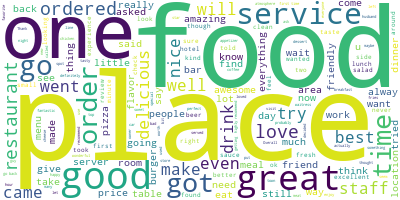

In [16]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(df_review['text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [17]:
# Create a dictionary from the preprocessed text
dictionary = corpora.Dictionary(df_review['processed_text'])

# Create the document-term matrix
corpus = [dictionary.doc2bow(doc) for doc in df_review['processed_text']]

In [18]:
from gensim.models import LdaModel

num_topics = 20  # Number of topics to generate
passes = 10  # Number of passes through the corpus during training

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=passes)


In [19]:
# Print the topics and associated words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.053*"great" + 0.042*"food" + 0.032*"service" + 0.031*"place" + 0.026*"back" + 0.021*"delicious" + 0.021*"breakfast" + 0.021*"good" + 0.020*"definitely" + 0.019*"friendly"')
(1, '0.198*"pizza" + 0.032*"italian" + 0.030*"crust" + 0.023*"cheese" + 0.021*"delivery" + 0.017*"wings" + 0.016*"pie" + 0.016*"pizzas" + 0.015*"order" + 0.015*"sauce"')
(2, '0.014*"dish" + 0.013*"salad" + 0.012*"menu" + 0.012*"chicken" + 0.011*"delicious" + 0.011*"sauce" + 0.011*"soup" + 0.011*"ordered" + 0.011*"restaurant" + 0.010*"meal"')
(3, '0.027*"cream" + 0.024*"ice" + 0.023*"coffee" + 0.018*"tea" + 0.017*"chocolate" + 0.017*"cake" + 0.015*"sweet" + 0.014*"thai" + 0.011*"delicious" + 0.011*"flavors"')
(4, '0.061*"dog" + 0.033*"dogs" + 0.016*"pet" + 0.013*"san" + 0.010*"vet" + 0.010*"blast" + 0.010*"delight" + 0.009*"bridge" + 0.009*"magic" + 0.009*"pies"')
(5, '0.026*"chicken" + 0.022*"burger" + 0.022*"cheese" + 0.021*"good" + 0.020*"fries" + 0.017*"sandwich" + 0.014*"ordered" + 0.013*"sauce" + 0.011*"

In [20]:
# Assign topics to documents
topic_assignments = [lda_model.get_document_topics(doc) for doc in corpus]


In [21]:
# Get the topic distribution for a specific document
document_index = 0  # Specify the document index
document = df_review['processed_text'][document_index]
document_bow = dictionary.doc2bow(document)
document_topics = lda_model.get_document_topics(document_bow)
print(document_topics)

[(8, 0.098271474), (10, 0.16226433), (15, 0.3053427), (16, 0.03852525), (18, 0.3361935), (19, 0.043486007)]


In [22]:
from gensim.models import CoherenceModel

# Assuming you have trained the LDA model and have the corpus and dictionary available

# Calculate coherence score
coherence_model = CoherenceModel(model=lda_model, texts=df_review['processed_text'], dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()

# Print the coherence score
print("Coherence Score:", coherence_score)


Coherence Score: 0.4759177416324623


In [24]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have trained the LDA model and have the corpus and dictionary available

# Get the topic-word distributions
topics = lda_model.get_topics()

# Compute topic similarity and diversity
topic_similarities = []
topic_diversities = []

num_topics = lda_model.num_topics

for i in range(num_topics):
    for j in range(i+1, num_topics):
        similarity = cosine_similarity([topics[i]], [topics[j]])[0][0]
        diversity = 1 - similarity  # Calculate diversity as 1 - similarity
        topic_similarities.append(similarity)
        topic_diversities.append(diversity)

average_similarity = sum(topic_similarities) / len(topic_similarities)
average_diversity = sum(topic_diversities) / len(topic_diversities)

print("Average Topic Similarity:", average_similarity)
print("Average Topic Diversity:", average_diversity)

Average Topic Similarity: 0.119016952402614
Average Topic Diversity: 0.880983047597386


In [31]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()

vis = gensimvis.prepare(lda_model, corpus, dictionary)
vis
#pyLDAvis.display(vis)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.177783 -0.084385       1        1  17.449206
18    -0.179625 -0.046001       2        1  11.870137
19    -0.172185  0.036898       3        1   7.462375
5     -0.075457  0.223452       4        1   7.102042
15    -0.164131 -0.009744       5        1   7.097793
2     -0.045745  0.219572       6        1   7.075779
12    -0.090734 -0.180259       7        1   5.900202
0     -0.158264  0.031196       8        1   5.606122
10    -0.119684 -0.125426       9        1   5.164152
16    -0.086684 -0.044636      10        1   4.306160
9     -0.059209 -0.002560      11        1   3.966964
17    -0.026011 -0.107330      12        1   3.761607
3      0.004183  0.195442      13        1   3.700798
6     -0.107358 -0.110307      14        1   2.428423
11     0.178483  0.183924      15        1   1.834924
7      0.226427  0.036122      16        1   1.426302
1      0.185528  0.174142      17        1   1.123193
14     0.250389 -0.164494      18        1   1.033303
13     0.298753 -0.115811      19        1   1.002753
4      0.319106 -0.109794      20        1   0.687766, topic_info=       Term          Freq         Total Category  logprob  loglift
12     food  57295.000000  57295.000000  Default  30.0000  30.0000
179   great  49308.000000  49308.000000  Default  29.0000  29.0000
601   pizza  11052.000000  11052.000000  Default  28.0000  28.0000
134   place  51664.000000  51664.000000  Default  27.0000  27.0000
14     good  52530.000000  52530.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
3978   lock    188.781847    189.790520  Topic20  -5.1997   4.9741
2584  blast    348.855758    355.278024  Topic20  -4.5856   4.9612
6880   eats    252.493948    393.403171  Topic20  -4.9089   4.5360
5109  dress    225.833306    629.792410  Topic20  -5.0205   3.9539
5810   jack    206.038449    372.423151  Topic20  -5.1122   4.3875

[1264 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
359       5  0.002348  accommodating
359       6  0.138558  accommodating
359       9  0.767938  accommodating
359      12  0.072801  accommodating
359      14  0.018005  accommodating
...     ...       ...            ...
4197     12  0.048941         yogurt
4197     13  0.949104         yogurt
4718      6  0.144597           york
4718     17  0.731368           york
4718     20  0.123641           york

[3060 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 19, 20, 6, 16, 3, 13, 1, 11, 17, 10, 18, 4, 7, 12, 8, 2, 15, 14, 5])